# Extreme neighbor count representation (Exercise 19)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("axes", labelsize=16)
plt.rc("axes", titlesize=16)
plt.rc("font", size=12)
from scipy.spatial.distance import pdist,squareform
from scipy.optimize import fmin
from matplotlib.colors import to_rgba

In [2]:
from week4 import LennardJones, AtomicCluster
lennard_jones_calc = LennardJones()

In [3]:
class ExtremeNeighborCount():
    
    def __init__(self, color='C5'):
        self.xwidth = 1
        self.color = color
        self.bin_centers = range(2)
    
    def descriptor(self,pos):
        connectivity_matrix = (squareform(pdist(pos)) <  ).astype(int)
        np.fill_diagonal()
        coordination_numbers = 
        Nlowest = np.min()
        Nhighest = np.max()
        return np.array([Nlowest,Nhighest])

    def draw(self,pos,ax):
        vector = self.descriptor(pos)
        ax.bar(self.bin_centers,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([0,7])
        xticklabels = ['$N_{lowest}$','$N_{highest}$']
        ax.set_xticks(range(len(xticklabels)))
        ax.set_xticklabels(xticklabels)
        ax.set_title(self.__class__.__name__)

extreme_neighbor_count = ExtremeNeighborCount()

In [4]:
def make_plot(filename,clusters):

    fig, axes = plt.subplots(3, 4, figsize=(12,9))
    for i,cluster in enumerate(clusters[:6]):
        row = i//2
        col = 2*(i%2)
        
        ax = axes[row,col]
        ring_size = 400
        cluster.draw(ax,ring_size,alpha=0.8,edge=True)
        
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_aspect('equal')
        ax.set_xlim([-b,b])
        ax.set_ylim([-b,b])
        ax.grid('on')
        
        ax = axes[row,col+1]
        cluster.draw_descriptor(ax)
    
    #fig.tight_layout()
    #fig.savefig(filename)

In [5]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)

In [6]:
b = 4
    
atomic_clusters = [AtomicCluster(lennard_jones_calc,pos=pos,
                                 descriptor_method=extreme_neighbor_count)\
            for pos in positions]


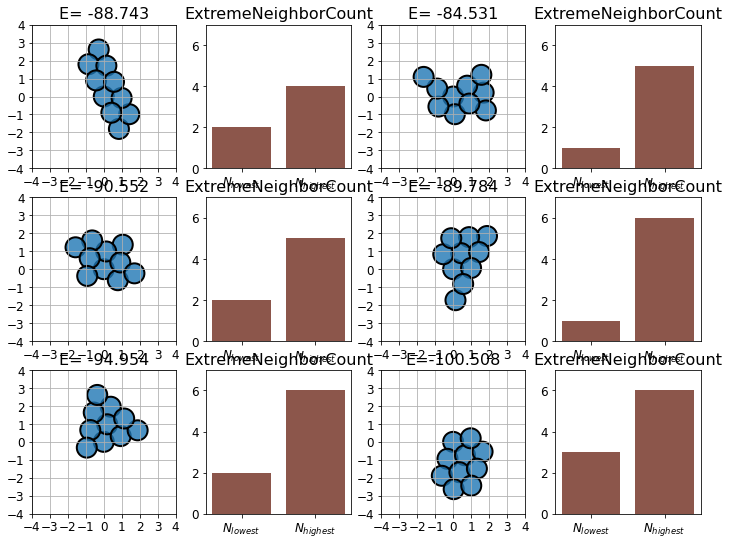

In [7]:
make_plot('exercise_19_fig1.png',[atomic_clusters[i] for i in [37, 4, 35, 9, 5, 20]])

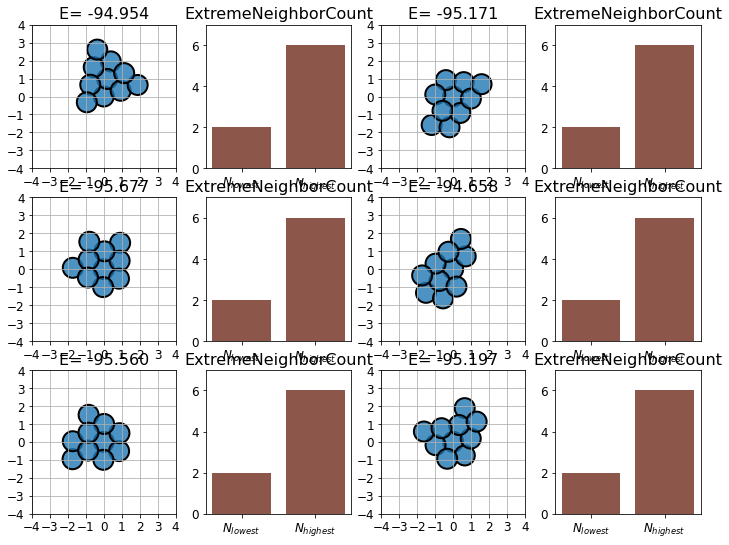

In [8]:
make_plot('exercise_19_fig2.png',[atomic_clusters[i] for i in [5, 30, 19, 16, 14, 12]])

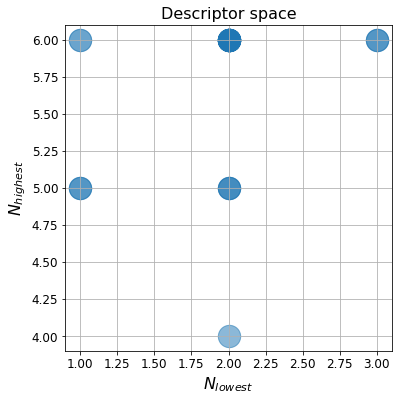

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm

descriptors = np.array([cluster.descriptor for cluster in atomic_clusters])

# Create a figure and axis object using object-oriented pyplot
fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(descriptors[:,0],descriptors[:,1], s=500, alpha=0.3)

ax.set_xlabel('$N_{lowest}$')
ax.set_ylabel('$N_{highest}$')
ax.set_title('Descriptor space')
ax.grid(True)
ax.set_aspect('equal')

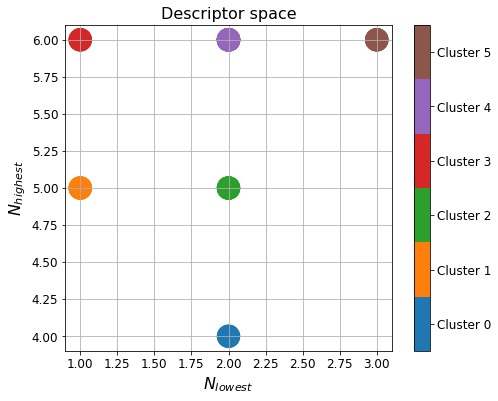

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

descriptors = np.array([cluster.descriptor for cluster in atomic_clusters])

# Hand-clustering
YOUR CODE

# Create a figure and axis object using object-oriented pyplot
fig, ax = plt.subplots(figsize=(8, 6))

cmap = ListedColormap([f'C{i}' for i in list(set(color_map.values()))])
norm = BoundaryNorm(np.arange(-0.5, n_clusters + 0.5, 1), cmap.N)

scatter = ax.scatter(descriptors[:,0],descriptors[:,1],
                     c=clusters, cmap=cmap, norm=norm, s=500)

# Add colorbar and labels
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(np.arange(n_clusters))
cbar.set_ticklabels([f'Cluster {i}' for i in range(n_clusters)]) 

ax.set_xlabel('$N_{lowest}$')
ax.set_ylabel('$N_{highest}$')
ax.set_title('Descriptor space')
ax.grid(True)
ax.set_aspect('equal')

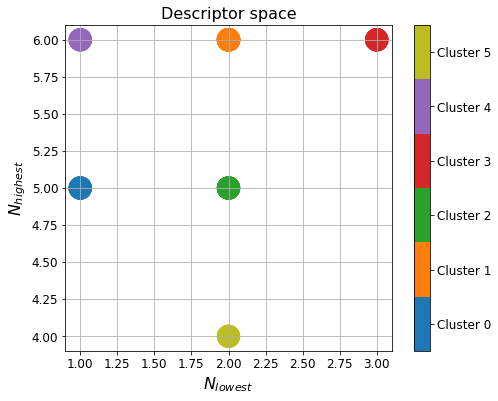

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
YOUR CODE
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm

descriptors = np.array([cluster.descriptor for cluster in atomic_clusters])

# Perform KMeans clustering
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(descriptors)

cmap = ListedColormap([f'C{i}' for i in [0, 1, 2, 3, 4, 8, 5, 6, 7, 9][:n_clusters]])
norm = BoundaryNorm(np.arange(-0.5, n_clusters + 0.5, 1), cmap.N)
alpha = 1

# Create a figure and axis object using object-oriented pyplot
fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(descriptors[:,0],descriptors[:,1],
                     c=clusters, cmap=cmap, norm=norm, s=500, alpha=alpha)

# Add colorbar and labels
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(np.arange(n_clusters))
cbar.set_ticklabels([f'Cluster {i}' for i in range(n_clusters)])

ax.set_xlabel('$N_{lowest}$')
ax.set_ylabel('$N_{highest}$')
ax.set_title('Descriptor space')
ax.grid(True)
ax.set_aspect('equal')


[]

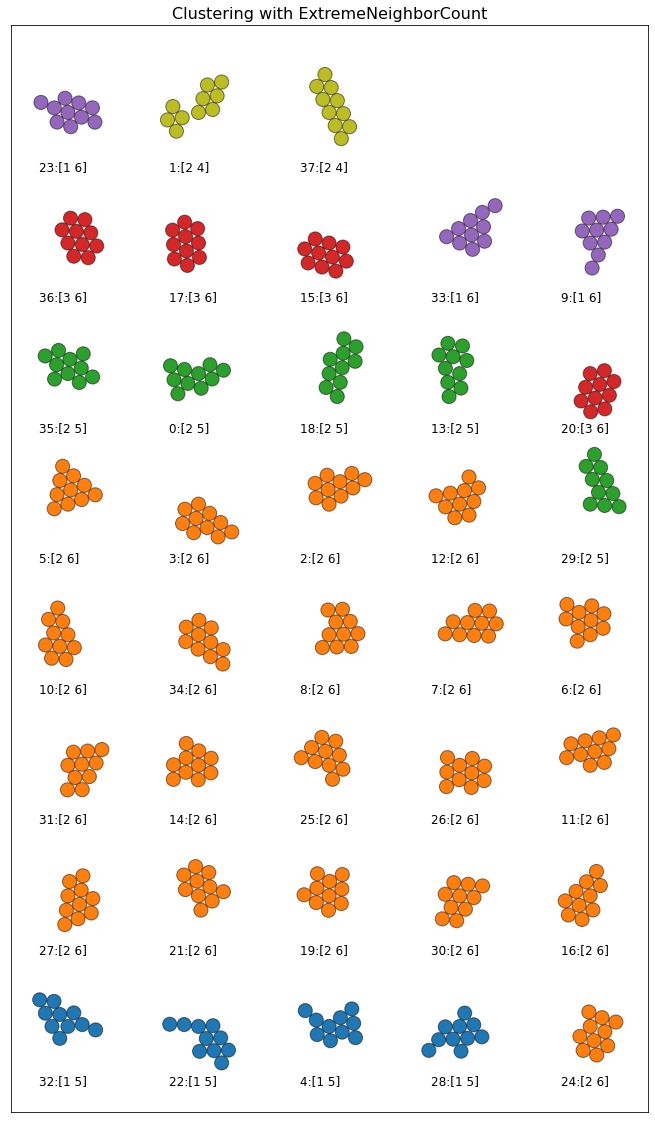

In [47]:
fig, ax = plt.subplots(figsize=(12,20))
a = 5
sorted_indices = [int(i) for i in np.argsort(clusters)]
#sorted_indices = range(len(clusters))
disps = {}
for i,(atomic_cluster,cluster,j) in enumerate(zip(np.array(atomic_clusters)[sorted_indices],
                                      clusters[sorted_indices],sorted_indices)):
    atomic_cluster_copy = atomic_cluster.copy()
    disp = disps.get(cluster,0)
    disps[cluster] = disp + 1
    atomic_cluster_copy.set_positions(atomic_cluster.get_positions() + \
                                      9*np.array([(i%a),(i//a)]) +0*np.array([disp,cluster]),
                                ignore_b=True)
    atomic_cluster_copy.draw(ax,size=200,color=cmap(cluster),alpha=alpha,energy_title=False)
    ax.text(9*(i%a)-2,9*(i//a)-4,str(j) + ':' + str(atomic_cluster.descriptor))
ax.set_aspect('equal')
ax.set_title('Clustering with ' + atomic_cluster.descriptor_method.__class__.__name__) 
ax.set_xticks([])
ax.set_yticks([])